In [3]:
print("shape of cancer data:{}".format(cancer.data.shape))

shape of cancer data:(569, 30)


In [155]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import mglearn
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import export_graphviz
#export_graphviz(tree, out_file="tree.dot",class_names=["malignant","benign"],
                #feature_names=cancer.feature_names,impurity=False,filled=True)


cancer = load_breast_cancer()
X_train,X_test,y_train,y_test =train_test_split(cancer["data"],cancer["target"],random_state=0)
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,stratify = cancer.target,random_state =66)
knn = KNeighborsClassifier(n_neighbors =1)

print("cancer.keys():\n{}".format(cancer))

cancer.keys():
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [156]:
print("sample count per class:{}".format({n:v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}))

sample count per class:{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [157]:
print("cancer features:{}".format(cancer.feature_names))

cancer features:['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [158]:
print("canser description:{}".format(cancer.DESCR))

canser description:.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Wo

In [159]:
print("cancer terget:{}".format(cancer.target))

cancer terget:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 

In [160]:
print("X_test:{}".format(X_test.shape))
print("y_test:{}".format(y_test.shape))

X_test:(143, 30)
y_test:(143,)


In [161]:
print(X_train.shape)
print(y_train.shape)
print("first five columns of data:\n{}".format(cancer['data'][:5]))

(426, 30)
(426,)
first five columns of data:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 

In [162]:
knn.fit(X_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [163]:
prediction = knn.predict(X_test,y_test)

TypeError: KNeighborsClassifier.predict() takes 2 positional arguments but 3 were given

In [164]:
new = np.array([
    [            
        
                 1.799e+01, 1.038e+01,
                 1.228e+02,
                 1.001e+03 ,1.184e-01,
                 2.776e-01, 3.001e-01, 
                 5.225e-03,
                 1.308e-02, 1.860e-02,
                 1.340e-02
                 ,1.389e-02, 3.532e-03,
                 
                 2.499e+01, 1.142e+01,
                 2.038e+01 ,7.758e+01 ,
                 3.861e+02, 1.425e-01, 
                 2.839e-01, 2.414e-01, 
                 1.149e-02,
                 2.461e-02, 5.688e-02 ,
                 1.885e-02, 1.756e-02 ,
                 5.115e-03 ,2.254e+01, 
                 6.399e-03,
                 4.904e-02,  
    ]
 
])


             






In [165]:
training_accuracy = []
test_accuracy =[]
neighbors_setting = range(1, 11)
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

    

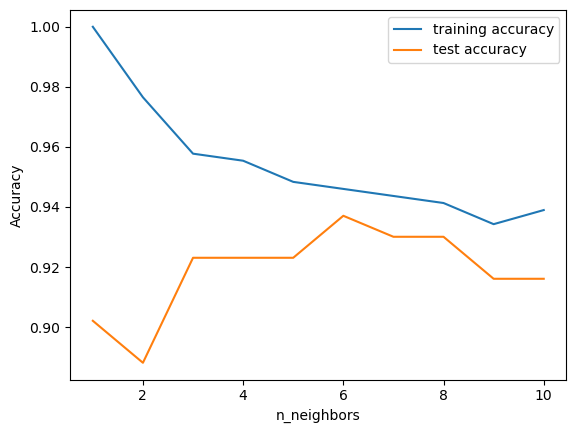

In [166]:
plt.plot(neighbors_setting,training_accuracy,label = "training accuracy")
plt.plot(neighbors_setting, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

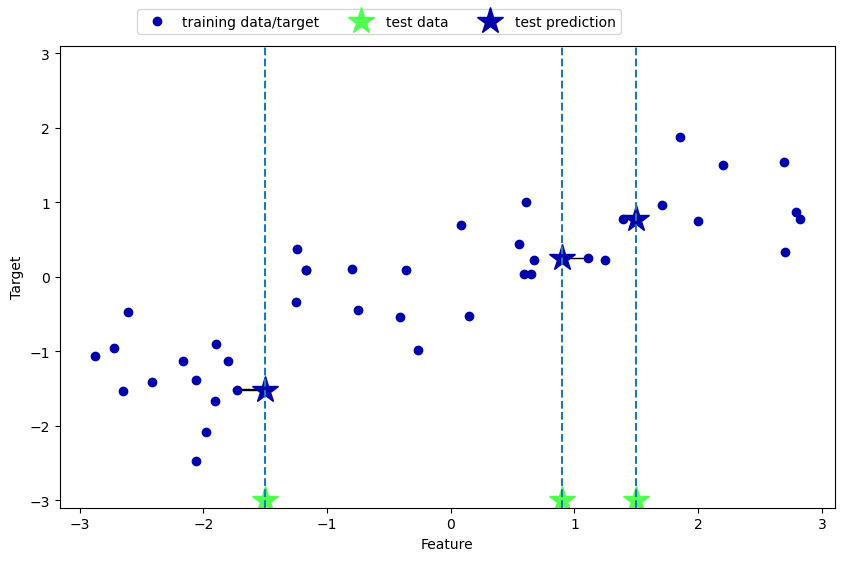

In [167]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

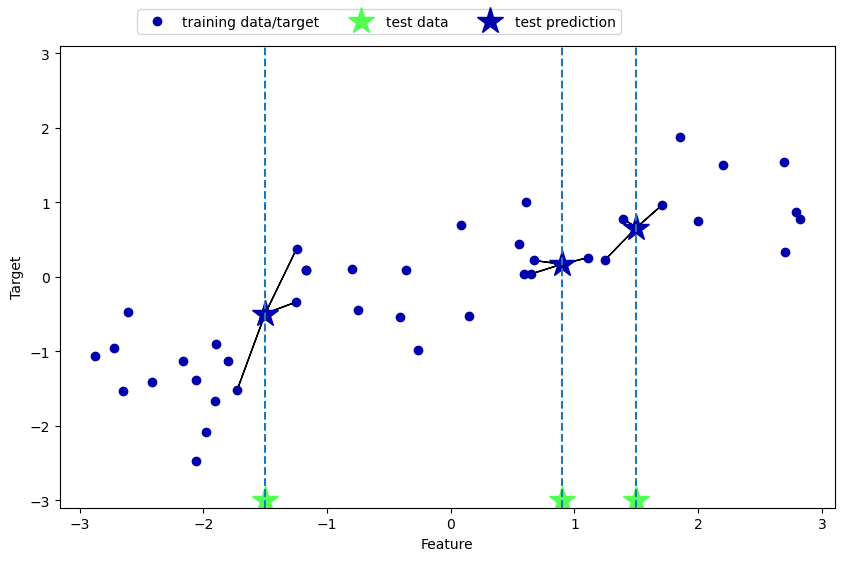

In [168]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [169]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

In [170]:
reg.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [171]:
print("test prediction set:\n{}".format(reg.predict(X_test)))

test prediction set:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [172]:
print("test score set:{:.2f}".format(reg.score(X_test,y_test)))

test score set:0.83


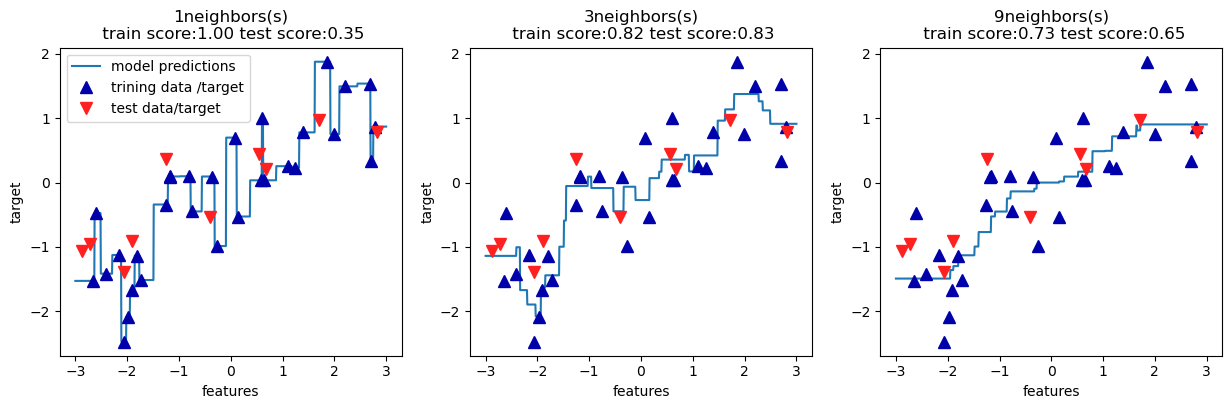

In [173]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
#create 1,000 data points,evenly spaced btw -3 and 3

line = np.linspace(-3,3,1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9],axes):
  reg= KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train,y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train,y_train, '^',c=mglearn.cm2(0),markersize=8)
  ax.plot(X_test,y_test, 'v',c=mglearn.cm2(1),markersize=8)

  ax.set_title(
        "{}neighbors(s)\n train score:{:.2f} test score:{:.2f}".format(
            n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
  ax.set_xlabel("features")
  ax.set_ylabel("target")
  axes[0].legend(["model predictions","trining data /target","test data/target"],loc="best")
        
    


In [174]:
from sklearn.linear_model import Ridge
print("training set:{:.2f}".format(ridge.score(X_train,y_train)))

NameError: name 'ridge' is not defined

In [ ]:
from sklearn.datasets import make_blobs


In [ ]:
X, y= make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0],X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0","class 1","class 2"])

In [175]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'